In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dfRes = pd.read_csv('reservations_(5).csv')
dfVeh = pd.read_csv('vehicles_(6).csv')

In [4]:
b1 = dfRes.groupby(['vehicle_id']).count()

In [7]:
b1.head()

,reservation_type
vehicle_id,
1,1
2,7
3,17
4,2
5,2


In [12]:
dfCom1 = pd.concat([dfVeh, b1], axis=1)

In [22]:
dfCom1 = dfCom1.fillna(value=0)

In [23]:
del dfcCom1

In [25]:
dfCom1.head()

,vehicle_id,technology,actual_price,recommended_price,num_images,street_parked,description,reservation_type
0,1.0,1.0,67.85,59.0,5.0,0.0,7.0,0.0
1,2.0,0.0,100.70,53.0,5.0,0.0,224.0,1.0
2,3.0,0.0,74.00,74.0,4.0,1.0,21.0,7.0
3,4.0,0.0,135.00,75.0,1.0,0.0,184.0,17.0
4,5.0,0.0,59.36,53.0,2.0,1.0,31.0,2.0


In [27]:
dfCom1.vehicle_id = dfCom1.vehicle_id.astype(int)
dfCom1.technology = dfCom1.technology.astype(int)
dfCom1.num_images = dfCom1.num_images.astype(int)
dfCom1.street_parked = dfCom1.street_parked.astype(int)
dfCom1.rename(columns={'reservation_type': 'reservation_count'}, inplace=True)
dfCom1.head()

,vehicle_id,technology,actual_price,recommended_price,num_images,street_parked,description,reservation_count
0,1,1,67.85,59.0,5,0,7.0,0.0
1,2,0,100.70,53.0,5,0,224.0,1.0
2,3,0,74.00,74.0,4,1,21.0,7.0
3,4,0,135.00,75.0,1,0,184.0,17.0
4,5,0,59.36,53.0,2,1,31.0,2.0


In [28]:
dfCom1.corr()

,vehicle_id,technology,actual_price,recommended_price,num_images,street_parked,description,reservation_count
vehicle_id,1.000000,-0.014897,-0.010482,-0.003227,-0.031765,0.055272,-0.055864,0.000149
technology,-0.014897,1.000000,-0.458542,-0.406569,-0.003642,-0.004169,0.033507,-0.036585
actual_price,-0.010482,-0.458542,1.000000,0.761772,-0.057760,0.007749,-0.011540,0.043899
recommended_price,-0.003227,-0.406569,0.761772,1.000000,-0.037494,0.016852,0.017243,0.029291
num_images,-0.031765,-0.003642,-0.057760,-0.037494,1.000000,-0.003776,0.012665,-0.000738
street_parked,0.055272,-0.004169,0.007749,0.016852,-0.003776,1.000000,-0.006972,-0.034899
description,-0.055864,0.033507,-0.011540,0.017243,0.012665,-0.006972,1.000000,0.004624
reservation_count,0.000149,-0.036585,0.043899,0.029291,-0.000738,-0.034899,0.004624,1.000000


corrmat = dfCom1.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

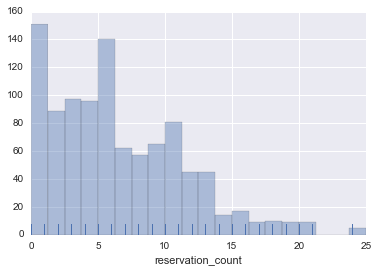

In [30]:
sns.distplot(dfCom1.reservation_count, bins=20, kde=False, rug=True)

In [32]:
cond = (dfCom1.reservation_count == 0)

In [36]:
dfCom1[cond].shape[0]

90

In [38]:
dfCom1.describe()

,vehicle_id,technology,actual_price,recommended_price,num_images,street_parked,description,reservation_count
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.00000,1001.000000,1001.000000
mean,500.000000,0.169830,87.852877,62.143856,3.004995,0.51049,90.701299,6.369630
std,289.108111,0.375671,29.839462,16.194298,1.351656,0.50014,76.963678,4.863048
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,250.000000,0.000000,64.890000,49.000000,2.000000,0.00000,25.000000,3.000000
50%,500.000000,0.000000,83.930000,62.000000,3.000000,1.00000,57.000000,5.000000
75%,750.000000,0.000000,107.010000,76.000000,4.000000,1.00000,158.000000,9.000000
max,1000.000000,1.000000,174.440000,90.000000,5.000000,1.00000,250.000000,25.000000


In [42]:
cond2 = dfCom1.recommended_price == 0
dfCom1 = dfCom1[~cond2]

In [43]:
dfCom1.tail()

,vehicle_id,technology,actual_price,recommended_price,num_images,street_parked,description,reservation_count
995,996,0,39.90,38.0,2,1,16.0,5.0
996,997,0,74.34,63.0,2,0,61.0,19.0
997,998,0,139.32,81.0,4,0,35.0,9.0
998,999,0,72.76,68.0,4,1,199.0,6.0
999,1000,0,76.44,42.0,4,1,92.0,9.0


In [44]:
dfCom1.corr()

,vehicle_id,technology,actual_price,recommended_price,num_images,street_parked,description,reservation_count
vehicle_id,1.000000,-0.015705,-0.015671,-0.009959,-0.035756,0.053613,-0.058031,0.000374
technology,-0.015705,1.000000,-0.461930,-0.411390,-0.004660,-0.004633,0.033000,-0.036530
actual_price,-0.015671,-0.461930,1.000000,0.759358,-0.064753,0.004764,-0.015089,0.044475
recommended_price,-0.009959,-0.411390,0.759358,1.000000,-0.046492,0.013034,0.012820,0.030011
num_images,-0.035756,-0.004660,-0.064753,-0.046492,1.000000,-0.006065,0.010074,-0.000450
street_parked,0.053613,-0.004633,0.004764,0.013034,-0.006065,1.000000,-0.008186,-0.034785
description,-0.058031,0.033000,-0.015089,0.012820,0.010074,-0.008186,1.000000,0.004780
reservation_count,0.000374,-0.036530,0.044475,0.030011,-0.000450,-0.034785,0.004780,1.000000


In [45]:
dfCom1.describe()

,vehicle_id,technology,actual_price,recommended_price,num_images,street_parked,description,reservation_count
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.170000,87.940730,62.206000,3.008000,0.511000,90.792000,6.369000
std,288.819436,0.375821,29.724589,16.082544,1.348983,0.500129,76.948644,4.865441
min,1.000000,0.000000,32.760000,35.000000,1.000000,0.000000,1.000000,0.000000
25%,250.750000,0.000000,64.942500,49.000000,2.000000,0.000000,25.000000,3.000000
50%,500.500000,0.000000,83.930000,62.000000,3.000000,1.000000,57.500000,5.000000
75%,750.250000,0.000000,107.010000,76.000000,4.000000,1.000000,158.000000,9.000000
max,1000.000000,1.000000,174.440000,90.000000,5.000000,1.000000,250.000000,25.000000


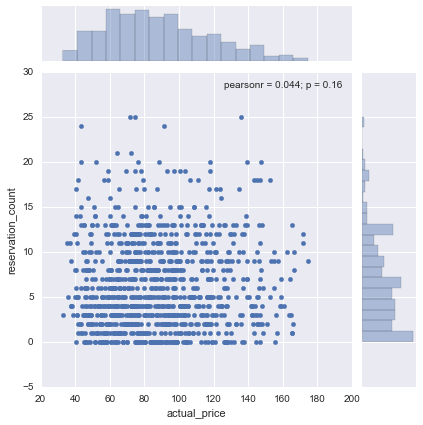

In [47]:
g = sns.jointplot(x=dfCom1.actual_price, y=dfCom1.reservation_count)

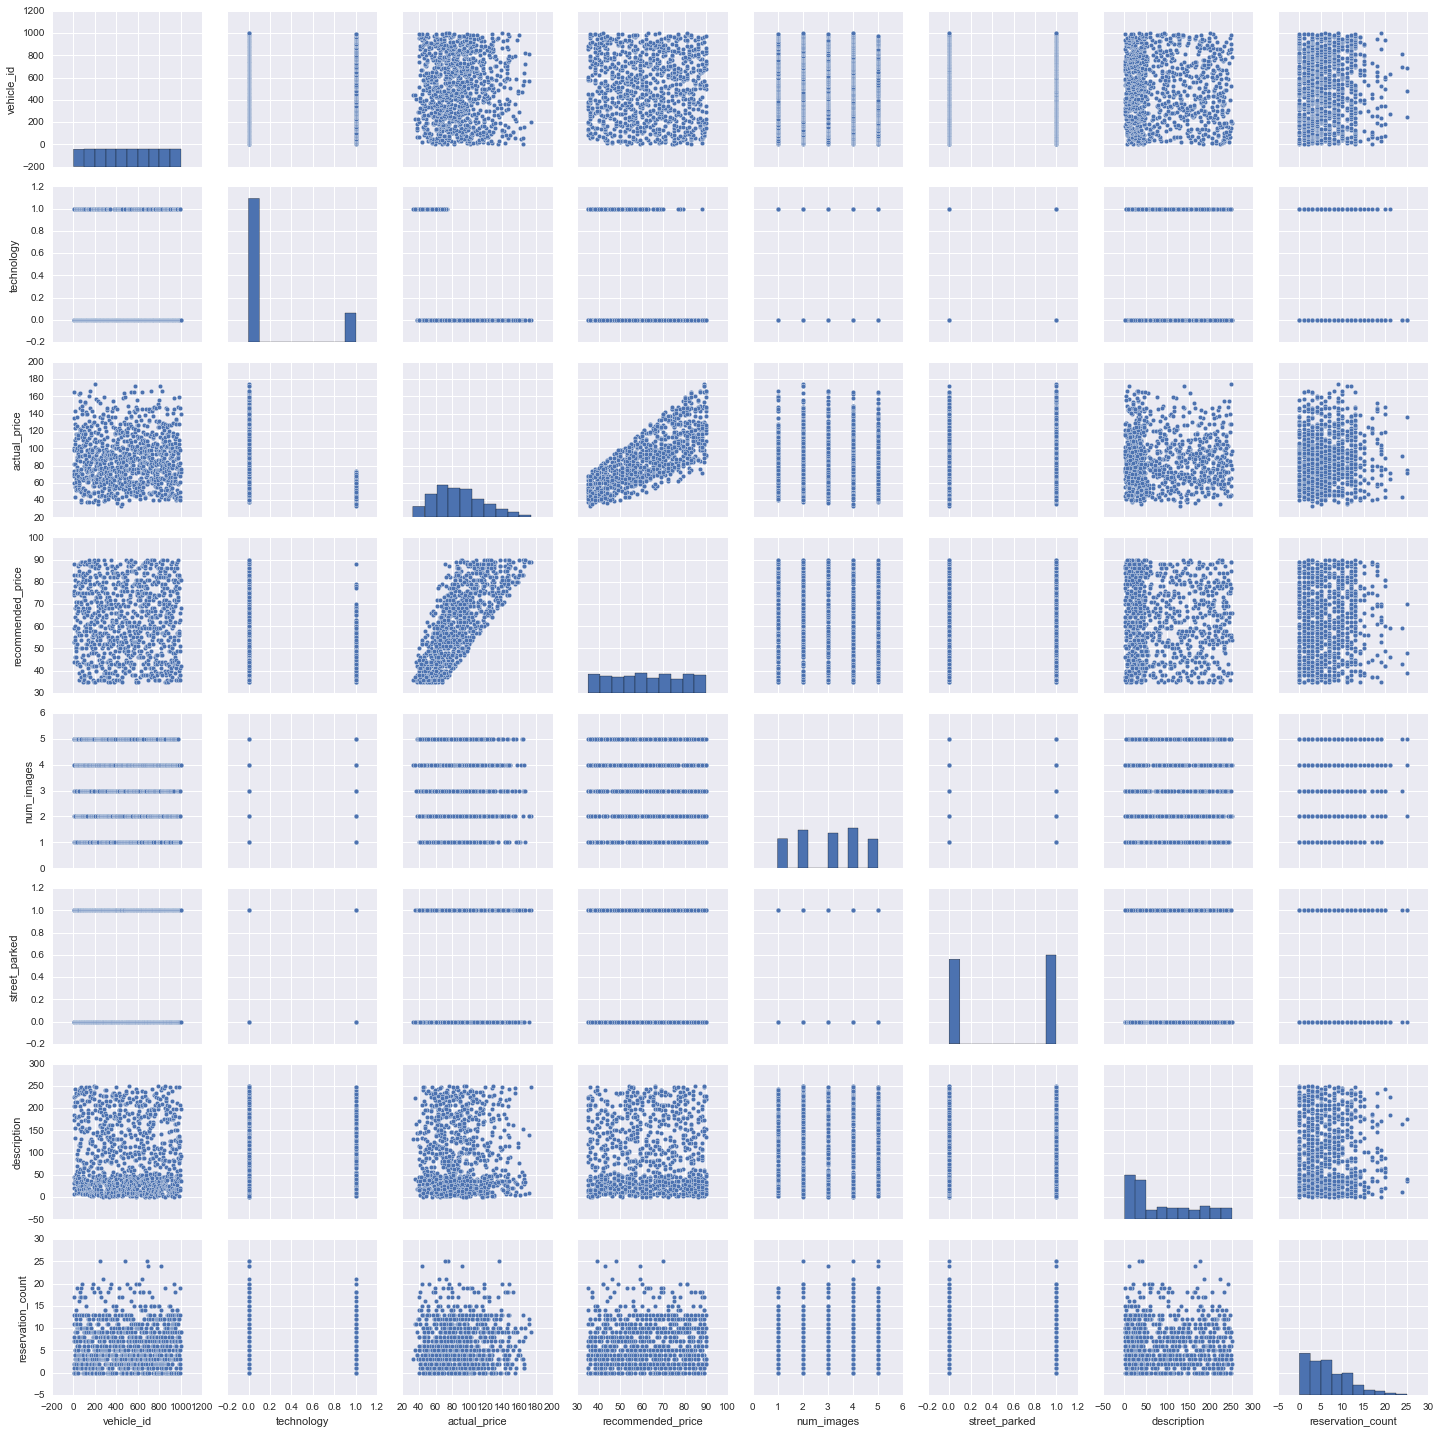

In [48]:
sns.pairplot(dfCom1)

In [ ]:
#Need to normalize the data
#Need to do "one-hot encoding" for rental types

In [50]:
#Creating one-hot encoding for rental types
condH = dfRes['reservation_type'] == 1
condD = dfRes['reservation_type'] == 2
condW = dfRes['reservation_type'] == 3

In [60]:
dfRes['hourlyCount'] = condH
dfRes['dailyCount'] = condD
dfRes['weeklyCount'] = condW

In [61]:
dfRes['hourlyCount'] = dfRes['hourlyCount'].astype(int)
dfRes['dailyCount'] = dfRes['dailyCount'].astype(int)
dfRes['weeklyCount'] = dfRes['weeklyCount'].astype(int)

In [65]:
dfRes = dfRes.rename(columns={'hourlyCount': 'hourly', 'dailyCount': 'daily', 'weeklyCount': 'weekly'})

In [66]:
dfRes.head()

,vehicle_id,reservation_type,hourly,daily,weekly
0,208,1,1,0,0
1,601,3,0,0,1
2,993,1,1,0,0
3,423,2,0,1,0
4,685,3,0,0,1


In [97]:
#create a test dataframe to remove reservation_type
cond
dfRes2 = dfRes.drop(['reservation_type','hourly','daily','weekly'],1)

In [98]:
b2= dfRes2.groupby(['vehicle_id']).count()

In [87]:
b3 = dfRes.groupby(['vehicle_id','hourly','daily','weekly']).count()

In [92]:
b4 = dfRes.groupby(['vehicle_id','reservation_type']).count()

In [108]:
dfRes = dfRes.drop(['hourly','daily','weekly'],1)
dfResH = dfRes[condH]
dfResD = dfRes[condD]
dfResW = dfRes[condW]

In [112]:
bH = dfResH.groupby(['vehicle_id']).count()
bD = dfResD.groupby(['vehicle_id']).count()
bW = dfResW.groupby(['vehicle_id']).count(

In [113]:
bH = bH.rename(columns={'reservation_type':'hourly'})
bD = bD.rename(columns={'reservation_type':'daily'})
bW = bW.rename(columns={'reservation_type':'weekly'})

In [135]:
bH.head()

,hourly
vehicle_id,
1,1
2,4
3,1
4,1
6,4


In [137]:
bH.iloc[0:3]

,hourly
vehicle_id,
1,1
2,4
3,1


In [119]:
bHDW = pd.concat([bH, bD, bW], axis=1)

In [121]:
bHDW = bHDW.fillna(value=0)

In [122]:
bHDW = bHDW.astype(int)

In [126]:
bHDW.sum()

hourly    2339
daily     2057
weekly    1980
dtype: int64

In [139]:
dfVeh.vehicle_id = dfVeh.vehicle_id.astype(int)
dfVeh.technology = dfVeh.technology.astype(int)
dfVeh.num_images = dfVeh.num_images.astype(int)
dfVeh.street_parked = dfVeh.street_parked.astype(int)

In [140]:
dfCom2 = pd.concat([dfVeh, bHDW], axis=1)

In [142]:
dfCom2.hourly = dfCom2.hourly.shift(-1)
dfCom2.daily = dfCom2.daily.shift(-1)
dfCom2.weekly = dfCom2.weekly.shift(-1)

In [145]:
dfCom2 = dfCom2.fillna(value=0)

In [146]:
dfCom2 = dfCom2[~cond2]

In [147]:
dfCom2.vehicle_id = dfCom2.vehicle_id.astype(int)
dfCom2.technology = dfCom2.technology.astype(int)
dfCom2.num_images = dfCom2.num_images.astype(int)
dfCom2.street_parked = dfCom2.street_parked.astype(int)

In [149]:
dfCom2.describe()

,vehicle_id,technology,actual_price,recommended_price,num_images,street_parked,description,hourly,daily,weekly
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.170000,87.940730,62.206000,3.008000,0.511000,90.792000,2.339000,2.057000,1.980000
std,288.819436,0.375821,29.724589,16.082544,1.348983,0.500129,76.948644,2.263449,1.935846,1.853925
min,1.000000,0.000000,32.760000,35.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,250.750000,0.000000,64.942500,49.000000,2.000000,0.000000,25.000000,1.000000,1.000000,1.000000
50%,500.500000,0.000000,83.930000,62.000000,3.000000,1.000000,57.500000,2.000000,2.000000,2.000000
75%,750.250000,0.000000,107.010000,76.000000,4.000000,1.000000,158.000000,4.000000,3.000000,3.000000
max,1000.000000,1.000000,174.440000,90.000000,5.000000,1.000000,250.000000,14.000000,12.000000,12.000000


In [150]:
dfCom2.tail()

,vehicle_id,technology,actual_price,recommended_price,num_images,street_parked,description,hourly,daily,weekly
995,996,0,39.90,38.0,2,1,16.0,4.0,10.0,5.0
996,997,0,74.34,63.0,2,0,61.0,5.0,1.0,3.0
997,998,0,139.32,81.0,4,0,35.0,3.0,2.0,1.0
998,999,0,72.76,68.0,4,1,199.0,1.0,1.0,7.0
999,1000,0,76.44,42.0,4,1,92.0,1.0,4.0,2.0


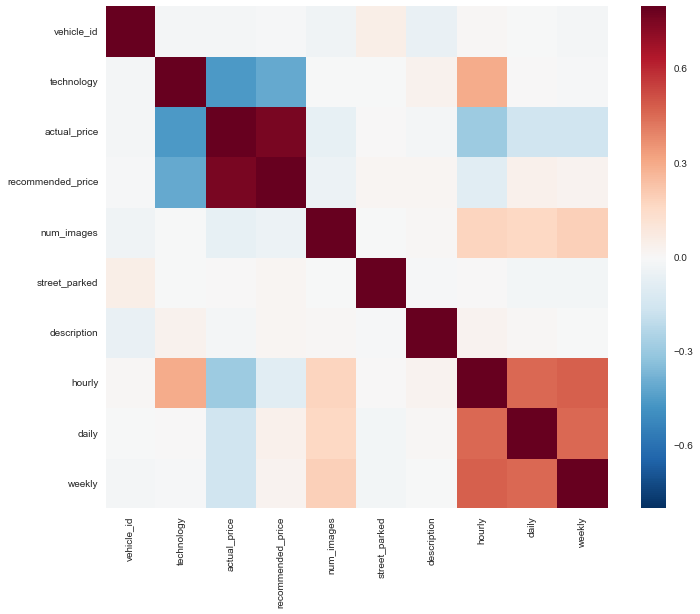

In [151]:
corrmat = dfCom2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [152]:
dfCom2.corr()

,vehicle_id,technology,actual_price,recommended_price,num_images,street_parked,description,hourly,daily,weekly
vehicle_id,1.000000,-0.015705,-0.015671,-0.009959,-0.035756,0.053613,-0.058031,0.012002,-0.005268,-0.013540
technology,-0.015705,1.000000,-0.461930,-0.411390,-0.004660,-0.004633,0.033000,0.296976,0.003178,-0.008045
actual_price,-0.015671,-0.461930,1.000000,0.759358,-0.064753,0.004764,-0.015089,-0.292720,-0.156600,-0.157998
recommended_price,-0.009959,-0.411390,0.759358,1.000000,-0.046492,0.013034,0.012820,-0.090053,0.043639,0.030925
num_images,-0.035756,-0.004660,-0.064753,-0.046492,1.000000,-0.006065,0.010074,0.175159,0.166184,0.188984
street_parked,0.053613,-0.004633,0.004764,0.013034,-0.006065,1.000000,-0.008186,0.000682,-0.022877,-0.020275
description,-0.058031,0.033000,-0.015089,0.012820,0.010074,-0.008186,1.000000,0.028090,0.009414,-0.001376
hourly,0.012002,0.296976,-0.292720,-0.090053,0.175159,0.000682,0.028090,1.000000,0.461626,0.476085
daily,-0.005268,0.003178,-0.156600,0.043639,0.166184,-0.022877,0.009414,0.461626,1.000000,0.457459
weekly,-0.013540,-0.008045,-0.157998,0.030925,0.188984,-0.020275,-0.001376,0.476085,0.457459,1.000000


In [160]:
condN = (dfCom2.hourly == 0) &  (dfCom2.daily == 0) &  (dfCom2.weekly == 0)

In [162]:
condN = condN.astype(int)

In [165]:
dfCom2 = pd.concat([dfCom2, condN], axis=1)

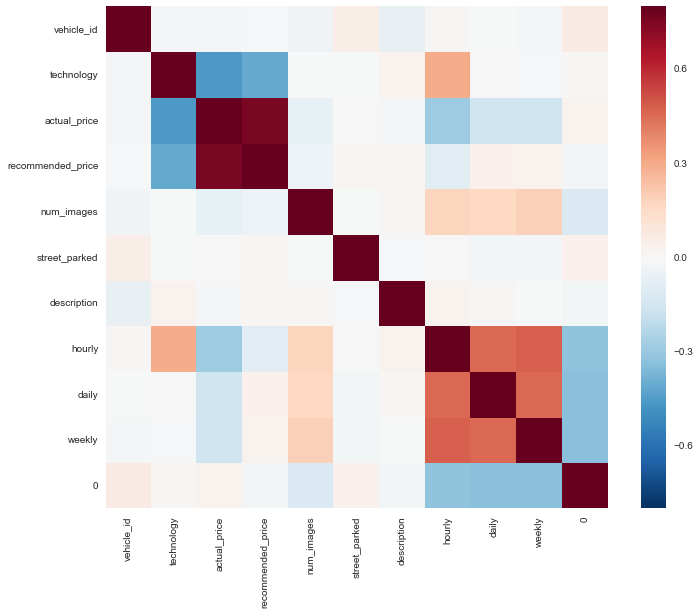

In [166]:
corrmat = dfCom2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [ ]:
#Variables needed:
#Revenue: hourly, daily and weekly rates
#Vehicle: Make, Model, Year 
#Date of reservation: Time,Day,Year
#Location.
#Renter Data: Age, Gender, Income, 
#

In [167]:
dfCom2.corr()

,vehicle_id,technology,actual_price,recommended_price,num_images,street_parked,description,hourly,daily,weekly,0
vehicle_id,1.000000,-0.015705,-0.015671,-0.009959,-0.035756,0.053613,-0.058031,0.012002,-0.005268,-0.013540,0.065384
technology,-0.015705,1.000000,-0.461930,-0.411390,-0.004660,-0.004633,0.033000,0.296976,0.003178,-0.008045,0.008134
actual_price,-0.015671,-0.461930,1.000000,0.759358,-0.064753,0.004764,-0.015089,-0.292720,-0.156600,-0.157998,0.027099
recommended_price,-0.009959,-0.411390,0.759358,1.000000,-0.046492,0.013034,0.012820,-0.090053,0.043639,0.030925,-0.023450
num_images,-0.035756,-0.004660,-0.064753,-0.046492,1.000000,-0.006065,0.010074,0.175159,0.166184,0.188984,-0.121670
street_parked,0.053613,-0.004633,0.004764,0.013034,-0.006065,1.000000,-0.008186,0.000682,-0.022877,-0.020275,0.038788
description,-0.058031,0.033000,-0.015089,0.012820,0.010074,-0.008186,1.000000,0.028090,0.009414,-0.001376,-0.019566
hourly,0.012002,0.296976,-0.292720,-0.090053,0.175159,0.000682,0.028090,1.000000,0.461626,0.476085,-0.323156
daily,-0.005268,0.003178,-0.156600,0.043639,0.166184,-0.022877,0.009414,0.461626,1.000000,0.457459,-0.332290
weekly,-0.013540,-0.008045,-0.157998,0.030925,0.188984,-0.020275,-0.001376,0.476085,0.457459,1.000000,-0.333984


In [172]:
dfCom2 = dfCom2.rename(columns={0:'noReservation'})

,vehicle_id,technology,actual_price,recommended_price,num_images,street_parked,description,hourly,daily,weekly,noReservation
0,1,1,67.85,59.0,5,0,7.0,1.0,0.0,0.0,0
1,2,0,100.70,53.0,5,0,224.0,4.0,3.0,0.0,0
2,3,0,74.00,74.0,4,1,21.0,1.0,9.0,7.0,0
3,4,0,135.00,75.0,1,0,184.0,1.0,0.0,1.0,0
4,5,0,59.36,53.0,2,1,31.0,0.0,1.0,1.0,0


In [174]:
dfCom1.head()

,vehicle_id,technology,actual_price,recommended_price,num_images,street_parked,description,reservation_count
0,1,1,67.85,59.0,5,0,7.0,0.0
1,2,0,100.70,53.0,5,0,224.0,1.0
2,3,0,74.00,74.0,4,1,21.0,7.0
3,4,0,135.00,75.0,1,0,184.0,17.0
4,5,0,59.36,53.0,2,1,31.0,2.0


In [175]:
from sklearn import preprocessing

In [188]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(dfCom1)
df_normalized = pd.DataFrame(np_scaled)
df_normalized.head()

,0,1,2,3,4,5,6,7
0,0.000000,1.0,0.247671,0.436364,1.00,0.0,0.024096,0.00
1,0.001001,0.0,0.479531,0.327273,1.00,0.0,0.895582,0.04
2,0.002002,0.0,0.291078,0.709091,0.75,1.0,0.080321,0.28
3,0.003003,0.0,0.721626,0.727273,0.00,0.0,0.734940,0.68
4,0.004004,0.0,0.187747,0.327273,0.25,1.0,0.120482,0.08


In [189]:
df_normalized = (df_normalized.rename(columns={0:'vehicle_id', 1:'technology', 2:'actual_price', 3:'recommended_price', 
                                        4:'num_images',5:'street_parked',6:'description',7:'reservation_count'}))

In [190]:
df_normalized.corr()

,vehicle_id,technology,actual_price,recommended_price,num_images,street_parked,description,reservation_count
vehicle_id,1.000000,-0.015705,-0.015671,-0.009959,-0.035756,0.053613,-0.058031,0.000374
technology,-0.015705,1.000000,-0.461930,-0.411390,-0.004660,-0.004633,0.033000,-0.036530
actual_price,-0.015671,-0.461930,1.000000,0.759358,-0.064753,0.004764,-0.015089,0.044475
recommended_price,-0.009959,-0.411390,0.759358,1.000000,-0.046492,0.013034,0.012820,0.030011
num_images,-0.035756,-0.004660,-0.064753,-0.046492,1.000000,-0.006065,0.010074,-0.000450
street_parked,0.053613,-0.004633,0.004764,0.013034,-0.006065,1.000000,-0.008186,-0.034785
description,-0.058031,0.033000,-0.015089,0.012820,0.010074,-0.008186,1.000000,0.004780
reservation_count,0.000374,-0.036530,0.044475,0.030011,-0.000450,-0.034785,0.004780,1.000000


# Linear Regression Model 
from sklearn import linear_model
import statsmodels.formula.api as smf

In [196]:
lm = (smf.ols(formula='reservation_count ~ technology + actual_price + street_parked + num_images + description', 
              data=df_normalized).fit())
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:      reservation_count   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7114
Date:                Sun, 19 Mar 2017   Prob (F-statistic):              0.615
Time:                        14:05:33   Log-Likelihood:                 220.07
No. Observations:                1000   AIC:                            -428.1
Df Residuals:                     994   BIC:                            -398.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         0.2490      0.021     11.776

In [195]:
lm = smf.ols(formula='reservation_count ~ technology + actual_price + recommended_price + street_parked', data=df_normalized).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:      reservation_count   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8945
Date:                Sun, 19 Mar 2017   Prob (F-statistic):              0.467
Time:                        14:01:47   Log-Likelihood:                 220.08
No. Observations:                1000   AIC:                            -430.2
Df Residuals:                     995   BIC:                            -405.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             0.2516      0.01

In [194]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [211]:
clf = linear_model.LinearRegression()
#X = [df_normalized.technology, df_normalized.actual_price, df_normalized.street_parked, 
#     df_normalized.num_images, df_normalized.description]
X = df_normalized[['technology','actual_price','street_parked','num_images','description']].values
y = df_normalized[['reservation_count']].values
X.shape[0]
y.shape[0]

1000

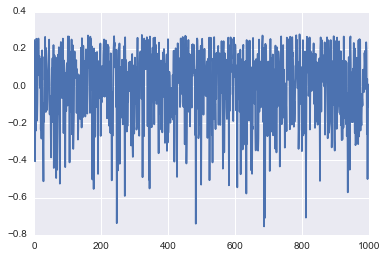

In [214]:
clf.fit(X,y)
y_hat = clf.predict(X)
plt.plot(y_hat-y)

In [237]:
import statsmodels.api as sm

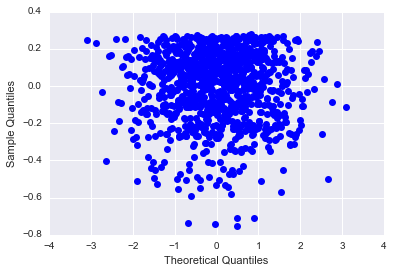

In [238]:
fig = sm.qqplot(y_hat-y)
plt.show()

In [242]:
from sklearn.metrics import mean_squared_error

In [251]:
score = mean_squared_error(y, y_hat)

In [252]:
score

0.037703217884816398

In [253]:
dfCom2.head()

,vehicle_id,technology,actual_price,recommended_price,num_images,street_parked,description,hourly,daily,weekly,noReservation
0,1,1,67.85,59.0,5,0,7.0,1.0,0.0,0.0,0
1,2,0,100.70,53.0,5,0,224.0,4.0,3.0,0.0,0
2,3,0,74.00,74.0,4,1,21.0,1.0,9.0,7.0,0
3,4,0,135.00,75.0,1,0,184.0,1.0,0.0,1.0,0
4,5,0,59.36,53.0,2,1,31.0,0.0,1.0,1.0,0


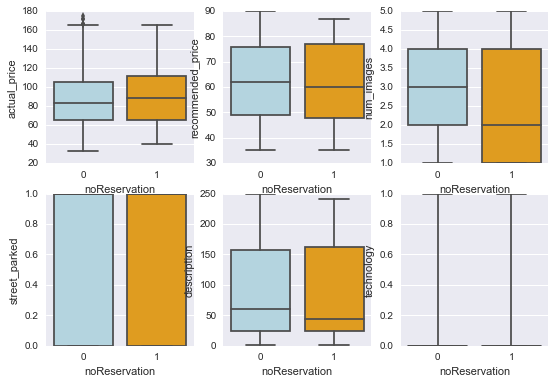

In [255]:
fig = plt.figure(figsize=(9,6))
ax1 = plt.subplot(231)
ax2 = plt.subplot(232)
ax3 = plt.subplot(233)
ax4 = plt.subplot(234)
ax5 = plt.subplot(235)
ax6 = plt.subplot(236)

c_palette = {0:'lightblue', 1:'orange'}
sns.boxplot('noReservation', 'actual_price', data=dfCom2, orient='v', ax=ax1, palette=c_palette)
sns.boxplot('noReservation', 'recommended_price', data=dfCom2, orient='v', ax=ax2, palette=c_palette)
sns.boxplot('noReservation', 'num_images', data=dfCom2, orient='v', ax=ax3, palette=c_palette)
sns.boxplot('noReservation', 'street_parked', data=dfCom2, orient='v', ax=ax4, palette=c_palette)
sns.boxplot('noReservation', 'description', data=dfCom2, orient='v', ax=ax5, palette=c_palette)
sns.boxplot('noReservation', 'technology', data=dfCom2, orient='v', ax=ax6, palette=c_palette)



